In [1]:
# Step 2.1: Import required libraries
import pandas as pd
import numpy as np

# Step 2.2: Load dataset
# (Replace path if your file name is different)
df = pd.read_csv('/content/European_Bank - European_Bank.csv')

# Step 2.3: Basic dataset inspection
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

# Step 2.4: Check column names
print("\nColumns:")
print(df.columns)

# Step 2.5: Check missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Step 2.6: Check churn distribution
churn_counts = df['Exited'].value_counts()
churn_percentage = df['Exited'].value_counts(normalize=True) * 100

print("\nChurn Counts:")
print(churn_counts)

print("\nChurn Percentage:")
print(churn_percentage)


Dataset Shape: (10000, 14)

First 5 rows:


,Year,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,2025,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2025,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,2025,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,2025,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,2025,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0



Columns:
Index(['Year', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

Missing values per column:
Year               0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Churn Counts:
Exited
0    7963
1    2037
Name: count, dtype: int64

Churn Percentage:
Exited
0    79.63
1    20.37
Name: proportion, dtype: float64


In [2]:
# Step 3.1: Drop non-informative columns

# Create a copy (safe practice)
df_clean = df.copy()

# Drop columns that should never go into ML model
df_clean.drop(columns=['CustomerId', 'Surname', 'Year'], inplace=True)

# Separate features and target
X = df_clean.drop('Exited', axis=1)
y = df_clean['Exited']

print("Features shape:", X.shape)
print("Target shape:", y.shape)

print("\nFeature columns:")
print(X.columns)


Features shape: (10000, 10)
Target shape: (10000,)

Feature columns:
Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')


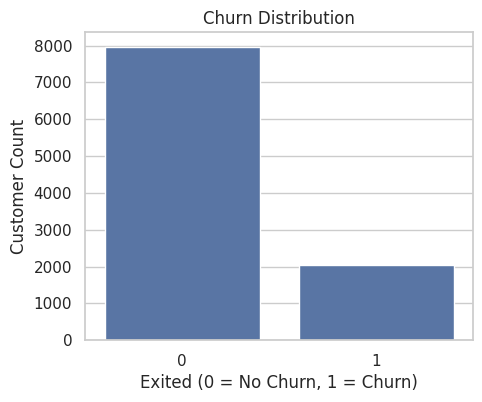

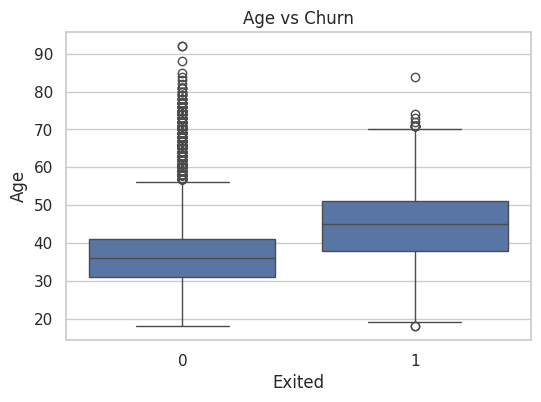

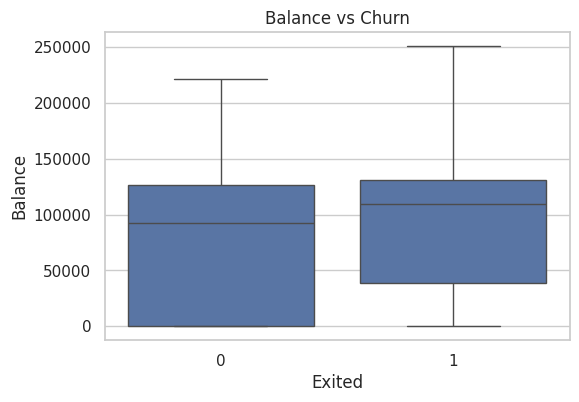

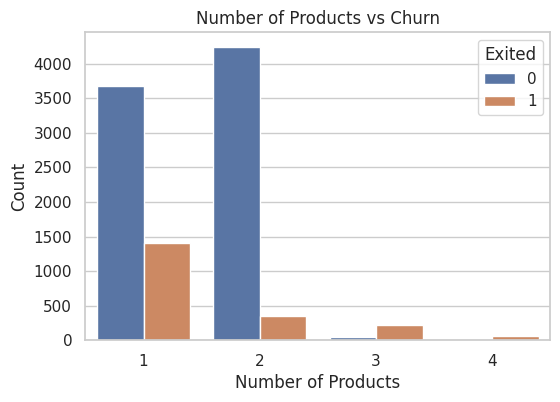

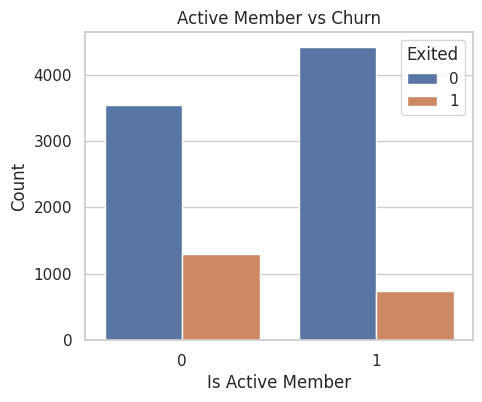

In [3]:
# Step 2.2: Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Basic style
sns.set(style="whitegrid")

# 1️⃣ Churn Distribution (Count Plot)
plt.figure(figsize=(5,4))
sns.countplot(x='Exited', data=df)
plt.title("Churn Distribution")
plt.xlabel("Exited (0 = No Churn, 1 = Churn)")
plt.ylabel("Customer Count")
plt.show()


# 2️⃣ Age vs Churn
plt.figure(figsize=(6,4))
sns.boxplot(x='Exited', y='Age', data=df)
plt.title("Age vs Churn")
plt.xlabel("Exited")
plt.ylabel("Age")
plt.show()


# 3️⃣ Balance vs Churn
plt.figure(figsize=(6,4))
sns.boxplot(x='Exited', y='Balance', data=df)
plt.title("Balance vs Churn")
plt.xlabel("Exited")
plt.ylabel("Balance")
plt.show()


# 4️⃣ Number of Products vs Churn
plt.figure(figsize=(6,4))
sns.countplot(x='NumOfProducts', hue='Exited', data=df)
plt.title("Number of Products vs Churn")
plt.xlabel("Number of Products")
plt.ylabel("Count")
plt.legend(title="Exited")
plt.show()


# 5️⃣ IsActiveMember vs Churn
plt.figure(figsize=(5,4))
sns.countplot(x='IsActiveMember', hue='Exited', data=df)
plt.title("Active Member vs Churn")
plt.xlabel("Is Active Member")
plt.ylabel("Count")
plt.legend(title="Exited")
plt.show()


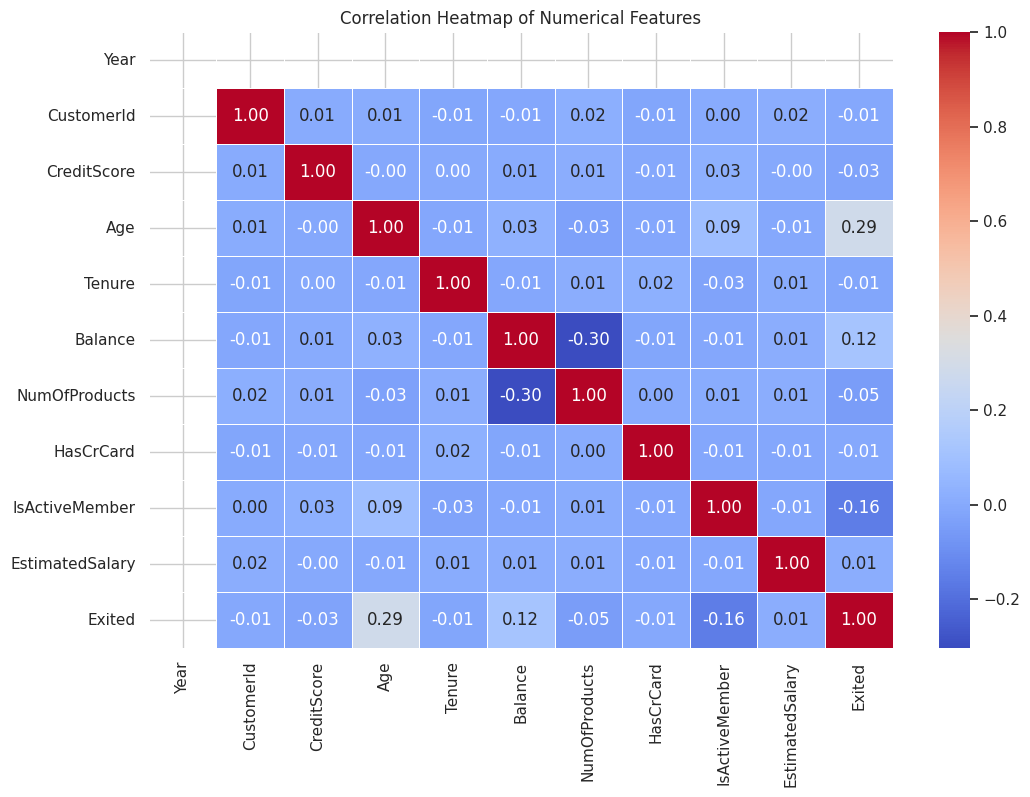

In [6]:
# Step 2.3: Correlation Heatmap

plt.figure(figsize=(12, 8))

# Correlation only on numeric features
corr_matrix = df.select_dtypes(include=['int64', 'float64']).corr()

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)

plt.title("Correlation Heatmap of Numerical Features")
plt.show()


In [5]:
# Step 4: Feature Engineering (EDA-based)

df_fe = df_clean.copy()

# 1️⃣ Balance to Salary Ratio
df_fe['BalanceSalaryRatio'] = df_fe['Balance'] / (df_fe['EstimatedSalary'] + 1)

# 2️⃣ Product Density (products per tenure year)
df_fe['ProductDensity'] = df_fe['NumOfProducts'] / (df_fe['Tenure'] + 1)

# 3️⃣ Engagement Score
df_fe['EngagementScore'] = df_fe['IsActiveMember'] * df_fe['NumOfProducts']

# 4️⃣ Age to Tenure Ratio
df_fe['AgeTenureRatio'] = df_fe['Age'] / (df_fe['Tenure'] + 1)

# 5️⃣ Zero Balance Flag
df_fe['ZeroBalanceFlag'] = (df_fe['Balance'] == 0).astype(int)

print("New feature set shape:", df_fe.shape)
print("\nSample of engineered features:")
display(df_fe.head())


New feature set shape: (10000, 16)

Sample of engineered features:


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,ProductDensity,EngagementScore,AgeTenureRatio,ZeroBalanceFlag
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.000000,0.333333,1,14.000000,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.744670,0.500000,1,20.500000,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1.401362,0.333333,0,4.666667,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.000000,1.000000,0,19.500000,1
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1.587035,0.333333,1,14.333333,0


In [7]:
# Step 5.1: Feature Importance before Encoding

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Copy feature-engineered dataframe
df_imp = df_fe.copy()

# TEMPORARY encoding for categorical features (only for importance check)
le_geo = LabelEncoder()
le_gender = LabelEncoder()

df_imp['Geography'] = le_geo.fit_transform(df_imp['Geography'])
df_imp['Gender'] = le_gender.fit_transform(df_imp['Gender'])

# Separate X and y
X_imp = df_imp.drop('Exited', axis=1)
y_imp = df_imp['Exited']

# Train Random Forest
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced'
)

rf.fit(X_imp, y_imp)

# Create feature importance dataframe
feature_importance = pd.DataFrame({
    'Feature': X_imp.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Top Important Features:")
display(feature_importance.head(10))


Top Important Features:


,Feature,Importance
3,Age,0.205785
13,AgeTenureRatio,0.100126
9,EstimatedSalary,0.096661
0,CreditScore,0.096024
6,NumOfProducts,0.091897
5,Balance,0.086928
10,BalanceSalaryRatio,0.076425
11,ProductDensity,0.056456
12,EngagementScore,0.047715
4,Tenure,0.040970


In [8]:
# Step 6: Proper Categorical Encoding

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Separate features and target again
X = df_fe.drop('Exited', axis=1)
y = df_fe['Exited']

# Identify categorical and numerical columns
categorical_cols = ['Geography', 'Gender']
numerical_cols = [col for col in X.columns if col not in categorical_cols]

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

# Column Transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols),
        ('num', 'passthrough', numerical_cols)
    ]
)

# Apply transformation
X_encoded = preprocessor.fit_transform(X)

print("Encoded feature shape:", X_encoded.shape)


Categorical Columns: ['Geography', 'Gender']
Numerical Columns: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'BalanceSalaryRatio', 'ProductDensity', 'EngagementScore', 'AgeTenureRatio', 'ZeroBalanceFlag']
Encoded feature shape: (10000, 16)


In [9]:
# Step 7: Scaling + Train-Test Split

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Separate features and target
X = df_fe.drop('Exited', axis=1)
y = df_fe['Exited']

# Identify categorical and numerical columns
categorical_cols = ['Geography', 'Gender']
numerical_cols = [col for col in X.columns if col not in categorical_cols]

# Preprocessing: Scaling + Encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),   # Scaling
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ]
)

# Train-test split (IMPORTANT: stratify=y)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

# Fit only on training data (NO DATA LEAKAGE)
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("Processed Train shape:", X_train_processed.shape)
print("Processed Test shape:", X_test_processed.shape)


Train shape: (8000, 15)
Test shape: (2000, 15)
Processed Train shape: (8000, 16)
Processed Test shape: (2000, 16)


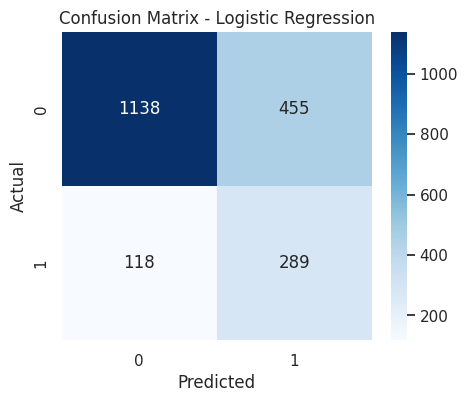

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1593
           1       0.39      0.71      0.50       407

    accuracy                           0.71      2000
   macro avg       0.65      0.71      0.65      2000
weighted avg       0.80      0.71      0.74      2000

ROC-AUC Score: 0.7762168948609626


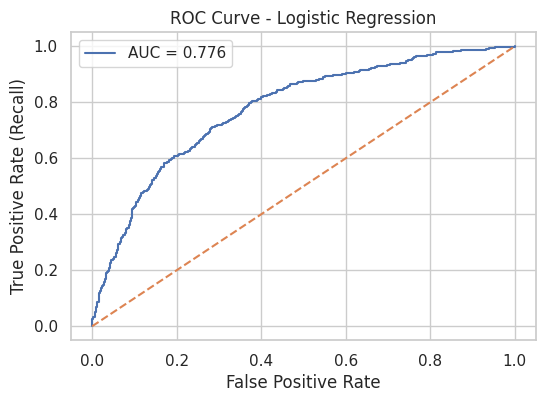

In [10]:
# Step 8: Baseline Logistic Regression Model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# Logistic Regression model
log_reg = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    solver='lbfgs'
)

# Create full pipeline (Preprocessing + Model)
from sklearn.pipeline import Pipeline

logistic_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', log_reg)
])

# Train the model
logistic_pipeline.fit(X_train, y_train)

# Predictions
y_pred = logistic_pipeline.predict(X_test)
y_pred_proba = logistic_pipeline.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score:", roc_auc)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()


In [11]:
# Step 9: Threshold Tuning

import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# We already have y_test and y_pred_proba from previous step
# y_pred_proba = logistic_pipeline.predict_proba(X_test)[:, 1]

thresholds = np.arange(0.30, 0.61, 0.05)

results = []

for t in thresholds:
    y_pred_t = (y_pred_proba >= t).astype(int)

    precision = precision_score(y_test, y_pred_t)
    recall = recall_score(y_test, y_pred_t)
    f1 = f1_score(y_test, y_pred_t)

    results.append({
        'Threshold': round(t, 2),
        'Precision': round(precision, 3),
        'Recall': round(recall, 3),
        'F1-score': round(f1, 3)
    })

# Convert to DataFrame
threshold_df = pd.DataFrame(results)

threshold_df


,Threshold,Precision,Recall,F1-score
0,0.30,0.269,0.907,0.415
1,0.35,0.298,0.877,0.445
2,0.40,0.328,0.843,0.472
3,0.45,0.357,0.776,0.489
4,0.50,0.388,0.710,0.502
5,0.55,0.416,0.622,0.499
6,0.60,0.470,0.565,0.513


In [12]:
# Step 10: SHAP Explainability

!pip install shap


In [13]:
import shap
import numpy as np
# Extract trained logistic regression model from pipeline
trained_model = logistic_pipeline.named_steps['model']

# Get feature names after preprocessing
feature_names = logistic_pipeline.named_steps['preprocessor'].get_feature_names_out()

# Transform test data
X_test_transformed = logistic_pipeline.named_steps['preprocessor'].transform(X_test)

# SHAP explainer for linear model
explainer = shap.LinearExplainer(
    trained_model,
    X_test_transformed,
    feature_perturbation="interventional"
)

# Compute SHAP values
shap_values = explainer.shap_values(X_test_transformed)


/usr/local/lib/python3.12/dist-packages/shap/explainers/_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


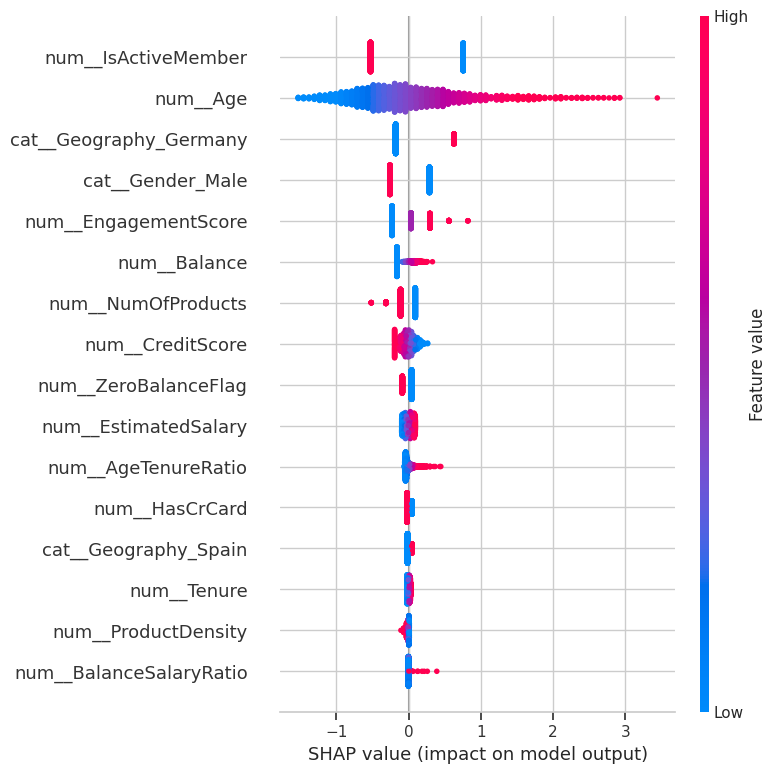

In [14]:
shap.summary_plot(
    shap_values,
    X_test_transformed,
    feature_names=feature_names,
    show=True
)


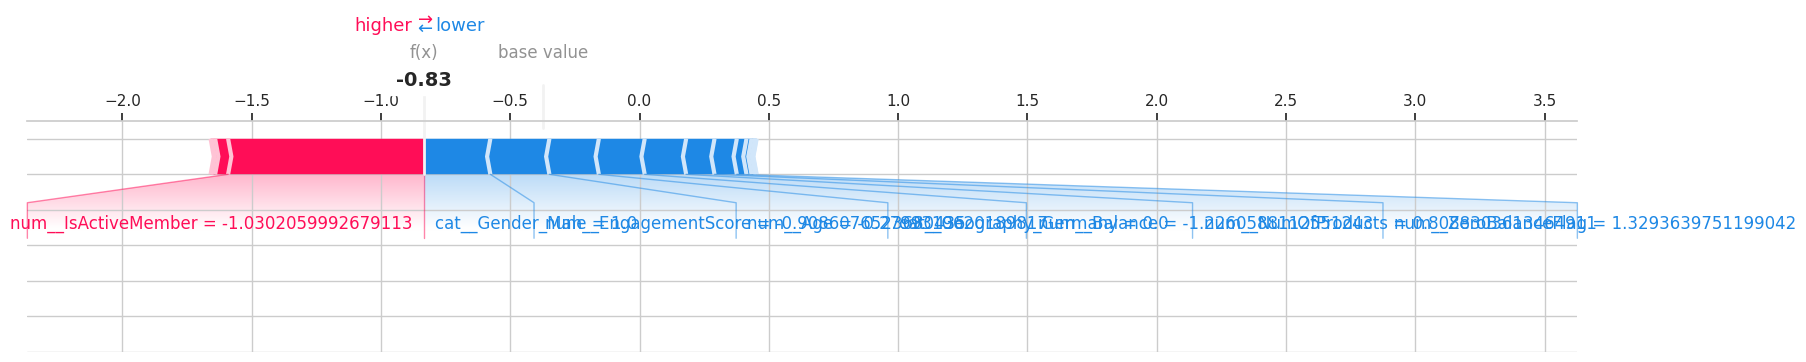

In [15]:
# Pick one customer (example: first high-risk customer)
customer_index = 0

shap.force_plot(
    explainer.expected_value,
    shap_values[customer_index],
    X_test_transformed[customer_index],
    feature_names=feature_names,
    matplotlib=True
)


In [16]:
# Step 11: Risk Scoring System

# Get churn probabilities for test data
churn_probabilities = y_pred_proba  # already computed earlier

# Create risk category function
def assign_risk(prob):
    if prob < 0.30:
        return "Low Risk"
    elif prob < 0.60:
        return "Medium Risk"
    else:
        return "High Risk"

# Apply risk scoring
risk_labels = [assign_risk(p) for p in churn_probabilities]

# Create final risk dataframe
risk_df = X_test.copy()
risk_df['Churn_Probability'] = churn_probabilities
risk_df['Risk_Category'] = risk_labels
risk_df['Actual_Churn'] = y_test.values

# Preview
risk_df.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,BalanceSalaryRatio,ProductDensity,EngagementScore,AgeTenureRatio,ZeroBalanceFlag,Churn_Probability,Risk_Category,Actual_Churn
5702,585,France,Male,36,7,0.00,2,1,0,94283.09,0.000000,0.250000,0,4.500000,1,0.302758,Medium Risk,0
3667,525,Germany,Male,33,4,131023.76,2,0,0,55072.93,2.379052,0.400000,0,6.600000,0,0.553864,Medium Risk,0
1617,557,Spain,Female,40,4,0.00,2,0,1,105433.53,0.000000,0.400000,2,8.000000,1,0.358445,Medium Risk,0
5673,639,Spain,Male,34,5,139393.19,2,0,0,33950.08,4.105707,0.333333,0,5.666667,0,0.363095,Medium Risk,0
4272,640,Spain,Female,34,3,77826.80,1,1,1,168544.85,0.461754,0.250000,1,8.500000,0,0.291952,Low Risk,0


In [17]:
# Risk category distribution
risk_counts = risk_df['Risk_Category'].value_counts()

risk_counts


,count
Risk_Category,
Medium Risk,881
Low Risk,630
High Risk,489


In [18]:
# Churn rate inside each risk bucket
risk_churn_analysis = (
    risk_df
    .groupby('Risk_Category')['Actual_Churn']
    .mean()
    .sort_values(ascending=False)
)

risk_churn_analysis


,Actual_Churn
Risk_Category,
High Risk,0.470348
Medium Risk,0.157775
Low Risk,0.060317


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.83      0.88      1593
           1       0.53      0.73      0.61       407

    accuracy                           0.81      2000
   macro avg       0.73      0.78      0.74      2000
weighted avg       0.84      0.81      0.82      2000

Random Forest ROC-AUC: 0.8653800179223908


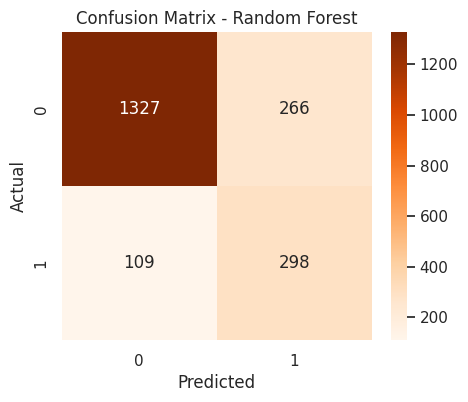

In [19]:
# Step 12: Random Forest Model

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=8,
    min_samples_leaf=20,
    random_state=42,
    class_weight='balanced'
)

# Pipeline: same preprocessor + RF
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', rf_model)
])

# Train RF
rf_pipeline.fit(X_train, y_train)

# Predictions
rf_pred = rf_pipeline.predict(X_test)
rf_pred_proba = rf_pipeline.predict_proba(X_test)[:, 1]

# Evaluation
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_pred))

rf_auc = roc_auc_score(y_test, rf_pred_proba)
print("Random Forest ROC-AUC:", rf_auc)

# Confusion Matrix
cm_rf = confusion_matrix(y_test, rf_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [22]:
import joblib

# Save logistic pipeline
joblib.dump(logistic_pipeline, "logistic_churn_model.pkl")

# Save random forest pipeline
joblib.dump(rf_pipeline, "rf_churn_model.pkl")


['rf_churn_model.pkl']